# Presentacion en PDF
https://docs.google.com/presentation/d/1xQefAFpYteCJ4ushbobLphBk7YXTeaMz/edit?usp=drive_link&ouid=101698133637703522752&rtpof=true&sd=true

# Aplicaciones móviles: segmentación de usuarios y usuarias en función del comportamiento (1)

### Ejercicio

Toma las acciones que los usuarios y las usuarias realizan en la aplicación para definir grupos que difieren en términos de métricas del producto (tasa de retención, tiempo dedicado a la aplicación, frecuencia de ocurrencia de eventos, conversión en el evento de destino, `contacts_show`).

- Lleva a cabo el análisis exploratorio de datos
- Segmenta a los usuarios y las usuarias en función de los eventos que completan
- Prueba las hipótesis estadísticas
    - Formula y prueba una hipótesis sobre la diferencia en la conversión en vistas de información de contacto entre quienes descargaron la aplicación de `bing` y quienes la descargaron de `google`.
    - Formula una hipótesis estadística sobre los datos del dataset y pruébala.

### Descripción de los datos

Los datasets contienen datos sobre los eventos que ocurrieron en la aplicación móvil Trash to Treasure, en la que los usuarios y las usuarias publican anuncios para vender cosas que ya no necesitan.

Los datos corresponden a quienes realizaron sus primeras acciones en la aplicación después del 7 de octubre de 2019.

`mobile_dataset_us.csv` contiene las siguientes columnas:

- `event.time`: cuando tuvo lugar el evento
- `[event.name]
- `[user.id]

`mobile_sources_us.csv` contiene las siguientes columnas:

- `userId`: ID de usuario/a
- `source`: la fuente desde la cual el usuario o la usuaria descargó la aplicación

Detalles del evento:

- `advert_open`: abrir una publicación publicitaria
- `photos_show`: ver fotos en el anuncio
- `tips_show`: se mostraron anuncios recomendados al usuario o la usuaria
- `tips_click`: el usuario o usuaria hizo clic en un anuncio recomendado
- `contacts_show` y `show_contacts`: el usuario o la usuaria hizo clic en el botón "mostrar número de teléfono" en el anuncio
- `contacts_call`: el usuario o la usuaria marcó el número del anuncio
- `map`: el usuario o la usuaria abrió el mapa de los anuncios publicados
- `search_1` - `search_7`: varios eventos relacionados con la búsqueda en el sitio web
- `favorites_add`: el usuario o la usuaria agregó el anuncio a favoritos

#### Importacion de librerias y lectura de tablas

In [1]:
import pandas as pd
from datetime import datetime
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
data = pd.read_csv('mobile_dataset_us.csv')
source = pd.read_csv('mobile_sources_us.csv')

In [3]:
# mostramos primera tabla
data.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [4]:
#renombramos columnas para mejor entendimiento
data.columns = ['event_time', 'event_name','user_id']
data.columns

Index(['event_time', 'event_name', 'user_id'], dtype='object')

In [5]:
#informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
# verificacion de valores ausentes
data.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

In [7]:
# verificaion de valores duplicados
data.duplicated().sum()

0

In [8]:
#mostramos segunda tabla
source.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [9]:
# renombramos columnas
source.columns=['user_id','source']
source.columns

Index(['user_id', 'source'], dtype='object')

In [10]:
# informacion del dataset
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  4293 non-null   object
 1   source   4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [11]:
#verificacion de valores ausentes
source.isna().sum()

user_id    0
source     0
dtype: int64

In [12]:
#verificacion de duplicados
source.duplicated().sum()

0

#### Union de tablas

In [13]:
data_new = data.merge(source, on='user_id')
data_new.sample(5)

,event_time,event_name,user_id,source
1103,2019-10-07 12:42:07.712387,tips_show,1a3361d1-2002-4389-a669-ecb06ea7a90a,bing
66149,2019-10-29 15:44:42.777447,tips_show,ded138fb-82c3-496b-a8f4-f576bee57b00,bing
23145,2019-10-13 16:43:39.190661,tips_show,be967f66-ad5d-47c4-bb4b-9127b4be2f33,bing
60723,2019-10-27 01:08:39.989284,advert_open,b84530e4-f692-4972-8129-ccabcbfb1985,google
29457,2019-10-16 15:33:02.986577,contacts_show,ca6c783d-8bf2-4f24-b8c0-e902932ce4f2,google


In [14]:
data_new['event_time'] = pd.to_datetime(data_new['event_time'])

In [15]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


In [16]:
data_new['session_year'] = data_new['event_time'].dt.year
data_new['session_month'] = data_new['event_time'].dt.month
data_new['session_day'] = data_new['event_time'].dt.day
data_new['session_week'] = data_new['event_time'].dt.isocalendar().week
data_new.head()

,event_time,event_name,user_id,source,session_year,session_month,session_day,session_week
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,10,7,41
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,10,7,41
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,10,7,41
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,10,7,41
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,10,7,41


#### Una vez que realizamos la descomposicion de los datos podemos contestar interrogantes que nos lleven a realizar una buena segmentacion de usuarios y usuarias asi como tambein poner a pruebas las hipotesis formuladas, entre las preguntas tenemos:
1 Cuál es la distribución de eventos por fuente(source)?

2 Cuál es la frecuencia de eventos por tipo (event_name)?

3 Cantidad de usuarios que prefieren la fuente bing, google y otros.

4 Cantidad de usuarios que visitan las fuentes por dia.

5 cantidad de usuarios acceden a un evento en especifico.

#### Hipotesis:

Hipótesis sobre la diferencia en la conversión en vistas de información de contacto entre usuarios de Bing y Google:

Hipótesis nula (H0): No hay diferencia en la conversión en vistas de información de contacto entre los usuarios que descargaron la aplicación de Bing y aquellos que la descargaron de Google.

Hipótesis alternativa (H1): Existe una diferencia en la conversión en vistas de información de contacto entre los usuarios de Bing y los de Google.

### Con el analisis exploratorio realizado anteriormente podemos proceder a probar las hipotesis planteada.

### 1 Cuál es la distribución de eventos por fuente(source)?

,count
source,
bing,34286
google,20445
other,19466


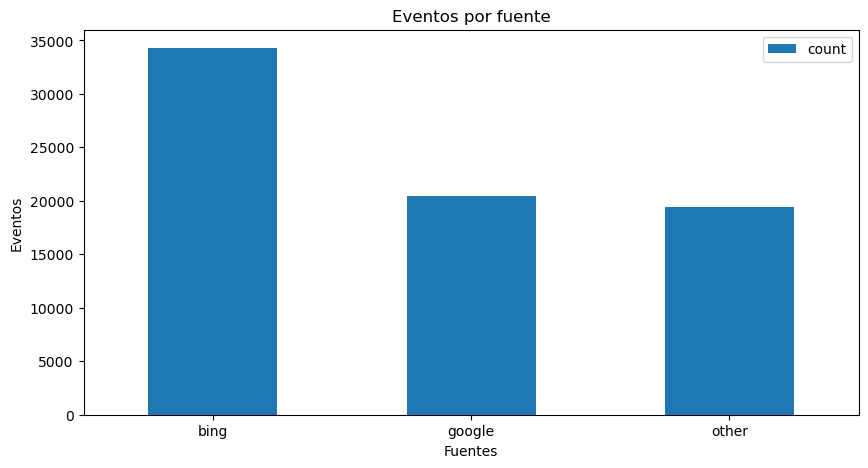

In [17]:
event_source = pd.DataFrame(data_new['source'].value_counts())
display(event_source)
event_source.plot(kind='bar',
               title='Eventos por fuente',
               xlabel='Fuentes',
               ylabel='Eventos',
               figsize=[10,5],
                  rot = 0
               )
plt.show()

**En el diagrama presentado podemos ver que la fuente con mayor distribucion por eventos es 'bing'**

### 2 Cuál es la frecuencia de eventos por tipo (event_name)?

,count
event_name,
tips_show,40055
photos_show,10012
advert_open,6164
contacts_show,4450
map,3881
search_1,3506
favorites_add,1417
search_5,1049
tips_click,814


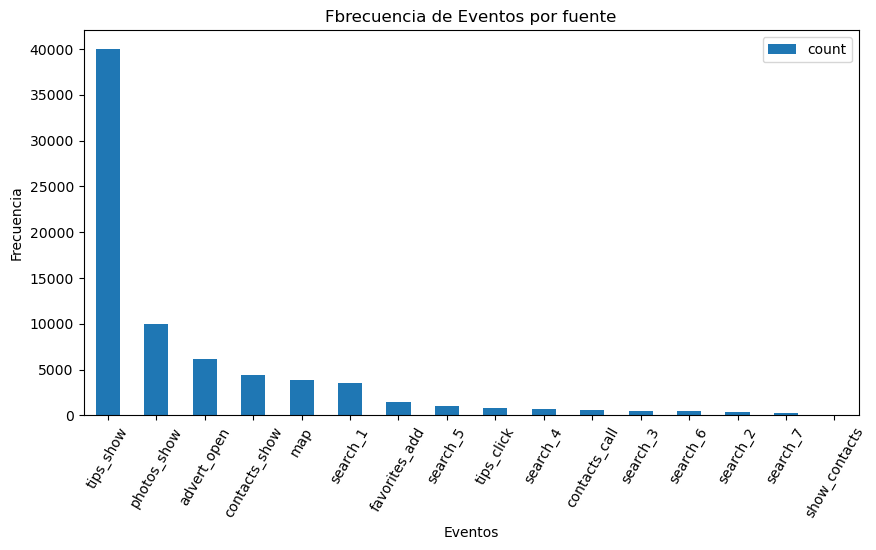

In [18]:
event_freq = pd.DataFrame(data_new['event_name'].value_counts())
display(event_freq)
event_freq.plot(kind='bar',
               title='Fbrecuencia de Eventos por fuente',
               xlabel='Eventos',
               ylabel='Frecuencia',
               figsize=[10,5],
                rot=60
             )
plt.show()

**En el grafico anterior podemos observamos que el evento con mayor popularidad que usan los usuarios es 'tips_show', estando 4 veces por encima del valor del evento subsiguiente que es 'photos_show'**

### 3 Cantidad de usuarios que prefieren la fuente bing, google y otros.


,user_id
source,
bing,1934
google,1129
other,1230


Cantidad total de usuarios unicos: 4293


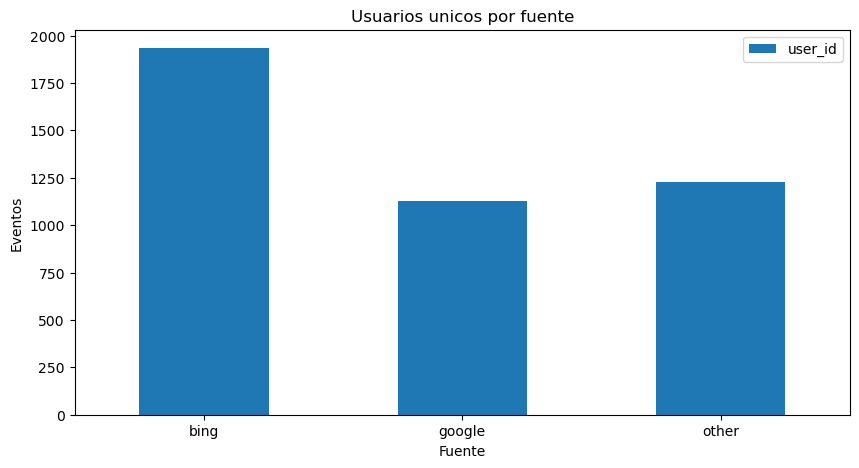

In [19]:
users_source = data_new.groupby('source')['user_id'].nunique()
users_source = pd.DataFrame(users_source)
display(users_source)
print('Cantidad total de usuarios unicos:',data_new['user_id'].nunique())
users_source.plot(kind='bar',
               title='Usuarios unicos por fuente',
               xlabel='Fuente',
               ylabel='Eventos',
               figsize=[10,5],
                  rot = 0
               )
plt.show()

**En este grafico podemos ver que la fuente con mas usuarios es 'bing', mientras que 'google' esta por debajo de otras fuentes preferidas por los usuarios.**

### 4 Cantidad de usuarios que visitan las fuentes por dia.

In [20]:
users_day = data_new.groupby(['session_day', 'session_month', 'session_year', 'source'])[['user_id']].nunique()
users_day.sort_values('user_id',ascending=False)

,,,,user_id
session_day,session_month,session_year,source,
28,10,2019,bing,157
24,10,2019,bing,151
23,10,2019,bing,150
15,10,2019,bing,143
21,10,2019,bing,143
...,...,...,...,...
13,10,2019,google,49
12,10,2019,other,48
10,10,2019,google,48


**En la tabla mostrada podemos ver que los dias en que hubo mayor cantidad de visitas fue 28, 24, y 23 de octubre de 2019 con 157,151 y 150 usuarios y usuarios respectivamente.**

### 5 cantidad de usuarios acceden a un evento en especifico.

In [21]:
event_especifico = data_new[data_new['event_name']== 'map']['user_id'].nunique()
print('Para el evento "map" la cantidad de usuarios que acceden al evento:', event_especifico)


Para el evento "map" la cantidad de usuarios que acceden al evento: 1456


# Hipotesis:
Hipótesis sobre la diferencia en la conversión en vistas de información de contacto entre usuarios de Bing y Google:

Hipótesis nula (H0): No hay diferencia en la conversión en vistas de información de contacto entre los usuarios que descargaron la aplicación de Bing y aquellos que la descargaron de Google.

Hipótesis alternativa (H1): Existe una diferencia en la conversión en vistas de información de contacto entre los usuarios de Bing y los de Google.

In [22]:
event_bing = data_new[data_new['source'] == 'bing']
event_bing = event_bing.loc[:,'user_id'].value_counts()
display(event_bing.head())

event_google = data_new[data_new['source'] == 'google']
event_google = event_google.loc[:,'user_id'].value_counts()
display(event_google.head())
alpha = 0.05
results = st.ttest_ind(event_bing, event_google, equal_var = False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha:         # comparar el valor p con el umbral
     print("Rechazamos la hipótesis nula")
else:
     print("No podemos rechazar la hipótesis nula")

user_id
cb36854f-570a-41f4-baa8-36680b396370    478
e13f9f32-7ae3-4204-8d60-898db040bcfc    465
9ce63488-758a-481a-bcb5-a02b467e1d84    407
21230dd9-2f7f-4b77-a436-43d4d10388e0    400
c140f88a-c544-4ce6-a6bd-578a1a0d1b18    288
Name: count, dtype: int64

user_id
be1449f6-ca45-4f94-93a7-ea4b079b8f0f    397
e38cb669-7335-4d56-9de5-c8d5d2f13fd3    362
abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c    356
320cab3c-e823-4dff-8c01-c4253764640a    353
28fccdf4-7b9e-42f5-bc73-439a265f20e9    308
Name: count, dtype: int64

valor p:  0.7478451633151909
No podemos rechazar la hipótesis nula


**No poedmos rechazar la hipotesis nula ya que no existe diferencia en la conversión en vistas de información de contacto entre los usuarios que descargaron la aplicación de Bing y aquellos que la descargaron de Google.**

# Conclusion

**Con el analisis realizado podemos concluir que la mayor cantidad de usuarios de aplicaiones mobiles prefieren usar como fuente principal la plataforma de busqueda 'bing', tambien pudimos definir los eventos mas populares ejecutados por los usuarios siendo 'tips_show', 'photos_show' y 'advert_open' las mas frecuentes. Con los datos obtenidos durante el analisis tambien podemos decir que para la conversion de vistas de informacion de contaco entre los usuarios que prefieren 'bing' y los que descargaron 'google' no existe deiferencia significativa, por lo tanto no podemos rechazar la hipotesis nula.**